#   Airbnb Data Analyze Report


###   Prepare and Download DataSet


In [ ]:
## initial directorys
!mkdir data/
!mkdir data/boston
!mkdir data/seattle

## download data from oss
!wget --no-check-certificate -c https://oss.hacking-linux.com/udacity/airbnb/seattle/calendar.csv -O data/seattle/calendar.csv
!wget --no-check-certificate -c https://oss.hacking-linux.com/udacity/airbnb/seattle/listings.csv -O data/seattle/listings.csv
!wget --no-check-certificate -c https://oss.hacking-linux.com/udacity/airbnb/seattle/reviews.csv -O data/seattle/reviews.csv
!wget --no-check-certificate -c https://oss.hacking-linux.com/udacity/airbnb/boston/calendar.csv -O data/boston/calendar.csv
!wget --no-check-certificate -c https://oss.hacking-linux.com/udacity/airbnb/boston/listings.csv -O data/boston/listings.csv
!wget --no-check-certificate -c https://oss.hacking-linux.com/udacity/airbnb/boston/reviews.csv -O data/boston/reviews.csv


###   import pkgs

In [1]:
## import pkgs
import re
import numpy as np
import pandas as pd
from copy import deepcopy
import matplotlib.pyplot as plt
import gender_guesser.detector as gender
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

## magic funcs
%matplotlib inline


###   Declare Global Values


In [2]:
## define base dir
DATA_DIR = './data'
SEATTLE_DIR = '{}/seattle'.format(DATA_DIR)
BOSTON_DIR = '{}/boston'.format(DATA_DIR)

## define data file point
FP_SEATTLE_CLENDAR = '{}/calendar.csv'.format(SEATTLE_DIR)
FP_SEATTLE_LISTINGS = '{}/listings.csv'.format(SEATTLE_DIR)
FP_SEATTLE_REVIEWS = '{}/reviews.csv'.format(SEATTLE_DIR)

FP_BOSTON_CLENDAR = '{}/calendar.csv'.format(BOSTON_DIR)
FP_BOSTON_LISTINGS = '{}/listings.csv'.format(BOSTON_DIR)
FP_BOSTON_REVIEWS = '{}/reviews.csv'.format(BOSTON_DIR)


###   Load Data


In [3]:
## load data from csv
df_seattle_clendar_raw = pd.read_csv(FP_SEATTLE_CLENDAR)
df_seattle_listings_raw = pd.read_csv(FP_SEATTLE_LISTINGS)
df_seattle_reviews_raw = pd.read_csv(FP_SEATTLE_REVIEWS)

df_boston_clendar_raw = pd.read_csv(FP_BOSTON_CLENDAR)
df_boston_listings_raw = pd.read_csv(FP_BOSTON_LISTINGS)
df_boston_reviews_raw = pd.read_csv(FP_BOSTON_REVIEWS)


###   Explore Data


####   df_seattle_clendar_raw:


-   The table of df_seattle_clendar_raw's meaning:

|Feature|Meaning|Relation|
|:-:|:-:|:-:|
|listing_id|清单id|df_seattle_listings_raw['id']|
|id|id|PK|
|date|日期||
|reviewer_id|审核人id||
|reviewer_name|审核人名||
|comments|备注||


In [4]:
df_seattle_clendar_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [5]:
df_seattle_clendar_raw.head()


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


####   df_seattle_listings_raw:


-   The table of df_seattle_listings_raw's meaning:

|Feature|Meaning|Relation|
|:-:|:-:|:-:|
|id|id|PK|
|listing_url|清单url||
|scrape_id|||
|last_scraped|||
|name|清单名||
|summary|摘要||
|space|空间||
|description|描述||
|experiences_offered|体验||
|neighborhood_overview|邻居||
|notes|记录||
|transit|中转||
|thumbnail_url|简介url||
|medium_url|视频url||
|picture_url|图片url||
|xl_picture_url|x1图片url||
|host_id|租客id||
|host_url|租客url||
|host_name|租客姓名||
|host_since|租客||
|host_location|租客地址||
|host_about|租客信息||
|host_response_time|租客响应时间||
|host_response_rate|租客响应率||
|host_acceptance_rate|租客验收率||
|host_is_superhost|租客是会员||
|host_thumbnail_url|租客简介url||
|host_picture_url|租客图片url||
|host_neighbourhood|租客邻居||
|host_listings_count|租客清单数||
|host_total_listings_count|租客清单总数||
|host_verifications|租客验证信息||
|host_has_profile_pic|租客是否有头像||
|host_identity_verified|租客账户是否验证||
|street|街道||
|neighbourhood|邻居||
|neighbourhood_cleansed|||
|neighbourhood_group_cleansed|||
|city|城市||
|state|街道||
|zipcode|邮编||
|market|市场||
|smart_location|智能定位||
|country_code|国家代码||
|country|国家||
|latitude|纬度||
|longitude|经度||
|is_location_exact|位置是否准确||
|property_type|房屋种类||
|room_type|房型||
|accommodates|容纳空间||
|bathrooms|浴室||
|bedrooms|卧室||
|beds|床||
|bed_type|床类型||
|amenities|设施||
|square_feet|平方||
|price|价格||
|weekly_price|价格(周)||
|monthly_price|价格(月)||
|security_deposit|保证金||
|cleaning_fee|清洁费||
|guests_included|客人数||
|extra_people|额外的人||
|minimum_nights|最少的夜晚||
|maximum_nights|最多的夜晚||
|calendar_updated|日历已更新||
|has_availability|有空房||
|availability_30|可租(30天)||
|availability_60|可租(60天)||
|availability_90|可租(90天)||
|availability_365|可租(365天)||
|calendar_last_scraped|||
|number_of_reviews|评论数||
|first_review|第一条评论||
|last_review|最后一条评论||
|review_scores_rating|评论分数||
|review_scores_accuracy|评论分数(准确度)||
|review_scores_cleanliness|评论分数(清洁度)||
|review_scores_checkin|评论分数(入住)||
|review_scores_communication|评论分数(交流)||
|review_scores_location|评论分数(位置)||
|review_scores_value|评论分数(价值)||
|requires_license|需要许可证||
|license|许可证||
|jurisdiction_names|辖区名称||
|instant_bookable|即时预订||
|cancellation_policy|取消政策||
|require_guest_profile_picture|需要租客头像||
|require_guest_phone_verification|需要租客手机通过验证||
|calculated_host_listings_count|计算租客清单数量||
|reviews_per_month|每个月的评论||


In [6]:
df_seattle_listings_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [7]:
df_seattle_listings_raw.head()


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


####   df_seattle_reviews_raw:


-   The table of df_seattle_reviews_raw's meaning:

|Feature|Meaning|Relation|
|:-:|:-:|:-:|
|listing_id|清单列表|df_seattle_listings_raw['id']|
|id|id|PK|
|date|日期||
|reviewer_id|评论id||
|reviewer_name|评论名||
|comments|备注||


In [8]:
df_seattle_reviews_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [9]:
df_seattle_reviews_raw.head()


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


####   df_boston_clendar_raw:


-   The table of df_boston_clendar_raw's meaning:

|Feature|Meaning|Relation|
|:-:|:-:|:-:|
|listing_id|清单id|df_boston_listings_raw['id']|
|date|日期||
|available|有效性||
|price|价格||


In [10]:
df_boston_clendar_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
listing_id    1308890 non-null int64
date          1308890 non-null object
available     1308890 non-null object
price         643037 non-null object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [11]:
df_boston_clendar_raw.head()


,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


####   df_boston_listings_raw:


-   The table of df_boston_listings_raw's meaning:

|Feature|Meaning|Relation|
|:-:|:-:|:-:|
|id|id|PK|
|listing_url|清单url||
|scrape_id|||
|last_scraped|||
|name|清单名||
|summary|摘要||
|space|空间||
|description|描述||
|experiences_offered|体验||
|neighborhood_overview|邻居||
|notes|记录||
|transit|中转	||
|access|访问||
|interaction|影响||
|house_rules|房屋规则||
|thumbnail_url|简介url||
|medium_url|媒体url||
|picture_url|图片url||
|xl_picture_url|x1图片url||
|host_id|租客id||
|host_url|租客url||
|host_name|租客姓名||
|host_since|租客预定时间||
|host_location|租客地址||
|host_about|租客信息||
|host_response_time|租客响应时间||
|host_response_rate|租客响应率||
|host_acceptance_rate|租客验收率||
|host_is_superhost|租客是会员||
|host_thumbnail_url|租客简介url||
|host_picture_url|租客图片url||
|host_neighbourhood|租客邻居||
|host_listings_count|租客清单数||
|host_total_listings_count|租客清单总数||
|host_verifications|租客验证信息||
|host_has_profile_pic|租客是否有头像||
|host_identity_verified|租客账户是否验证||
|street|街道||
|neighbourhood|邻居||
|neighbourhood_cleansed|||
|neighbourhood_group_cleansed|||
|city|城市||
|state|街道||
|zipcode|邮编||
|market|市场||
|smart_location|智能定位||
|country_code|国家代码||
|country|国家||
|latitude|纬度||
|longitude|经度||
|is_location_exact|位置是否准确||
|property_type|房屋种类||
|room_type|房型||
|accommodates|容纳空间||
|bathrooms|浴室||
|bedrooms|卧室||
|beds|床||
|bed_type|床类型||
|amenities|设施||
|square_feet|平方||
|price|价格||
|weekly_price|价格(周)||
|monthly_price|价格(月)||
|security_deposit|保证金||
|cleaning_fee|清洁费||
|guests_included|客人数||
|extra_people|额外的人||
|minimum_nights|最少的夜晚||
|maximum_nights|最多的夜晚||
|calendar_updated|日历已更新||
|has_availability|有空房||
|availability_30|可租(30天)||
|availability_60|可租(60天)||
|availability_90|可租(90天)||
|availability_365|可租(365天)||
|calendar_last_scraped|||
|number_of_reviews|评论数||
|first_review|第一条评论||
|last_review|最后一条评论||
|review_scores_rating|评论分数||
|review_scores_accuracy|评论分数(准确度)||
|review_scores_cleanliness|评论分数(清洁度)||
|review_scores_checkin|评论分数(入住)||
|review_scores_communication|评论分数(交流)||
|review_scores_location|评论分数(位置)||
|review_scores_value|评论分数(价值)||
|requires_license|需要许可证||
|license|许可证||
|jurisdiction_names|辖区名称||
|instant_bookable|即时预订||
|cancellation_policy|取消政策||
|require_guest_profile_picture|需要租客头像||
|require_guest_phone_verification|需要租客手机通过验证||
|calculated_host_listings_count|计算租客清单数量||
|reviews_per_month|每个月的评论||


In [12]:
df_boston_listings_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

In [13]:
df_boston_listings_raw.head()


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


####   df_boston_reviews_raw:


-   The table of df_boston_eviews_raw's meaning:

|Feature|Meaning|Relation|
|:-:|:-:|:-:|
|listing_id|清单id|df_boston_listings_raw['id']|
|id|id|PK|
|date|日期||
|reviewer_id|评论id||
|reviewer_name|评论名||
|comments|备注||


In [14]:
df_boston_reviews_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
listing_id       68275 non-null int64
id               68275 non-null int64
date             68275 non-null object
reviewer_id      68275 non-null int64
reviewer_name    68275 non-null object
comments         68222 non-null object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [15]:
df_boston_reviews_raw.head()


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


###   Check NaN Values


In [16]:
## deepcopy df
df_seattle_clendar = deepcopy(df_seattle_clendar_raw)
df_seattle_listings = deepcopy(df_seattle_listings_raw)
df_seattle_reviews = deepcopy(df_seattle_reviews_raw)

df_boston_clendar = deepcopy(df_boston_clendar_raw)
df_boston_listings = deepcopy(df_boston_listings_raw)
df_boston_reviews = deepcopy(df_boston_reviews_raw)


####   df_seattle_clendar_raw:


In [17]:
df_seattle_clendar.count()


listing_id    1393570
date          1393570
available     1393570
price          934542
dtype: int64

In [18]:
## listing_id, date, available, price
df_seattle_clendar.isnull().sum()


listing_id         0
date               0
available          0
price         459028
dtype: int64

In [19]:
## get all the NaN values in price
df_seattle_clendar[df_seattle_clendar_raw['price'].isnull()].head()


,listing_id,date,available,price
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN


-   After explore the NaN values of df_seattle_clendar, it only have some NaN price values with not available lines. That's ok, don't drop it.


####   df_seattle_listings_raw:


In [20]:
## explore data
df_seattle_listings.isnull().sum()


id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                   0
summary                              177
space                                569
description                            0
experiences_offered                    0
neighborhood_overview               1032
notes                               1606
transit                              934
thumbnail_url                        320
medium_url                           320
picture_url                            0
xl_picture_url                       320
host_id                                0
host_url                               0
host_name                              2
host_since                             2
host_location                          8
host_about                           859
host_response_time                   523
host_response_rate                   523
host_acceptance_

In [21]:
## get features have NaN values
nan_list = []
for feature in df_seattle_listings.columns:
    if df_seattle_listings[feature].isnull().sum() > 0:
        nan_list.append(feature)
        print('{}|{}'.format(feature, df_seattle_listings[feature].isnull().sum()))


summary|177
space|569
neighborhood_overview|1032
notes|1606
transit|934
thumbnail_url|320
medium_url|320
xl_picture_url|320
host_name|2
host_since|2
host_location|8
host_about|859
host_response_time|523
host_response_rate|523
host_acceptance_rate|773
host_is_superhost|2
host_thumbnail_url|2
host_picture_url|2
host_neighbourhood|300
host_listings_count|2
host_total_listings_count|2
host_has_profile_pic|2
host_identity_verified|2
neighbourhood|416
zipcode|7
property_type|1
bathrooms|16
bedrooms|6
beds|1
square_feet|3721
weekly_price|1809
monthly_price|2301
security_deposit|1952
cleaning_fee|1030
first_review|627
last_review|627
review_scores_rating|647
review_scores_accuracy|658
review_scores_cleanliness|653
review_scores_checkin|658
review_scores_communication|651
review_scores_location|655
review_scores_value|656
license|3818
reviews_per_month|627


In [22]:
## features have NaN values:
## 'summary', 'space', 'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 
## 'medium_url', 'xl_picture_url', 'host_name', 'host_since', 'host_location', 'host_about', 
## 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 
## 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 
## 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 
## 'zipcode', 'property_type', 'bathrooms', 'bedrooms', 'beds', 'square_feet', 'weekly_price', 
## 'monthly_price', 'security_deposit', 'cleaning_fee', 'first_review', 'last_review', 
## 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
## 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'license', 'reviews_per_month'

## summary allowed NaN values, so don't drop it
## df_seattle_listings['summary']

## space allowed NaN values, so don't drop it
## df_seattle_listings['space']

## neighborhood_overview allowed NaN values, so don't drop it
## df_seattle_listings['neighborhood_overview']

## notes allowed NaN values, so don't drop it
## df_seattle_listings['notes']

## transit allowed NaN values, so don't drop it
## df_seattle_listings['transit']

## thumbnail_url allowed NaN values, so don't drop it
## df_seattle_listings['thumbnail_url']

## medium_url allowed NaN values, so don't drop it
## df_seattle_listings['medium_url']

## xl_picture_url allowed NaN values, so don't drop it
## df_seattle_listings['xl_picture_url']

## host_name NaN values' drop
df_seattle_listings.drop(df_seattle_listings[df_seattle_listings['host_name'].isnull()].index,
                             inplace = True)

## host_since's NaN was dropped yet
## df_seattle_listings[df_seattle_listings['host_since'].isnull()]

## host_location NaN values' drop
df_seattle_listings.drop(df_seattle_listings[df_seattle_listings['host_location'].isnull()].index,
                             inplace = True)

## host_about allowed allowed NaN values, so don't drop it
## df_seattle_listings['host_about']

## host_response_time allowed NaN values, so don't drop it
## df_seattle_listings['host_response_time']

## host_response_rate allowed NaN values, so don't drop it
## df_seattle_listings['host_response_rate']

## host_acceptance_rate allowed NaN values, so don't drop it
## df_seattle_listings['host_acceptance_rate']

## host_is_superhost's allowed NaN values, so don't drop it
## df_seattle_listings[df_seattle_listings['host_is_superhost'].isnull()]

## host_thumbnail_url's allowed NaN values, so don't drop it
## df_seattle_listings[df_seattle_listings['host_thumbnail_url'].isnull()]

## host_picture_url's allowed NaN values, so don't drop it
## df_seattle_listings[df_seattle_listings['host_picture_url'].isnull()]

## trans host_is_superhost to [0, 1], and set NaN to 0
df_seattle_listings['host_is_superhost'].replace(['f', 't', np.NaN], [0, 1, 0], inplace = True)

## host_listings_count's allowed NaN values, so don't drop it
## df_seattle_listings[df_seattle_listings['host_listings_count'].isnull()]

## host_total_listings_count's allowed NaN values, so don't drop it
## df_seattle_listings[df_seattle_listings['host_total_listings_count'].isnull()]

## host_has_profile_pic's allowed NaN values, so don't drop it
## df_seattle_listings[df_seattle_listings['host_has_profile_pic'].isnull()]

## host_identity_verified's allowed NaN values, so don't drop it
## df_seattle_listings[df_seattle_listings['host_identity_verified'].isnull()]

## host_identity_verified's allowed NaN values, so don't drop it
## df_seattle_listings[df_seattle_listings['neighbourhood'].isnull()]

## zipcode's allowed NaN values, so don't drop it
## df_seattle_listings[df_seattle_listings['zipcode'].isnull()]

## property_type NaN values' drop
df_seattle_listings.drop(df_seattle_listings[df_seattle_listings['property_type'].isnull()].index,
                             inplace = True)

## trans bathrooms NaN to 0
df_seattle_listings['bathrooms'].replace([np.NaN], [0], inplace = True)

## trans bedrooms NaN to 0
df_seattle_listings['bedrooms'].replace([np.NaN], [0], inplace = True)

## beds NaN values' drop
df_seattle_listings.drop(df_seattle_listings[df_seattle_listings['beds'].isnull()].index,
                             inplace = True)

## square_feet feature have a lot of NaN values, at last think about drop this feature
df_seattle_listings.drop(['square_feet'], axis = 1, inplace = True)

## weekly_price's allowed NaN values, so don't drop it
## df_seattle_listings[df_seattle_listings['weekly_price'].isnull()]

## monthly_price's allowed NaN values, so don't drop it
## df_seattle_listings[df_seattle_listings['monthly_price'].isnull()]

## trans security_deposit NaN to 0
df_seattle_listings['security_deposit'].replace([np.NaN], [0], inplace = True)

## trans cleaning_fee NaN to 0
df_seattle_listings['cleaning_fee'].replace([np.NaN], [0], inplace = True)

## first_review NaN values' drop
df_seattle_listings.drop(df_seattle_listings[df_seattle_listings['first_review'].isnull()].index,
                             inplace = True)

## last_review's NaN values' drop
df_seattle_listings.drop(df_seattle_listings[df_seattle_listings['last_review'].isnull()].index,
                             inplace = True)

## review_scores_rating's NaN values' drop
df_seattle_listings.drop(df_seattle_listings[df_seattle_listings['review_scores_rating'].isnull()].index,
                             inplace = True)

## review_scores_accuracy's NaN values' drop
df_seattle_listings.drop(df_seattle_listings[df_seattle_listings['review_scores_accuracy'].isnull()].index,
                             inplace = True)

## review_scores_cleanliness's NaN values' drop
df_seattle_listings.drop(df_seattle_listings[df_seattle_listings['review_scores_cleanliness'].isnull()].index,
                             inplace = True)

## review_scores_checkin's NaN values' drop
df_seattle_listings.drop(df_seattle_listings[df_seattle_listings['review_scores_checkin'].isnull()].index,
                             inplace = True)

## review_scores_communication's NaN values' drop
df_seattle_listings.drop(df_seattle_listings[df_seattle_listings['review_scores_communication'].isnull()].index,
                             inplace = True)

## review_scores_location's NaN values' drop
df_seattle_listings.drop(df_seattle_listings[df_seattle_listings['review_scores_location'].isnull()].index,
                             inplace = True)

## review_scores_value's NaN values' drop
df_seattle_listings.drop(df_seattle_listings[df_seattle_listings['review_scores_value'].isnull()].index,
                             inplace = True)

## license feature have a lot of NaN values, at last think about drop this feature
df_seattle_listings.drop(['license'], axis = 1, inplace = True)

## reviews_per_month is ok now, nothing to drop
## df_seattle_listings[df_seattle_listings['reviews_per_month'].isnull()]


####   df_seattle_reviews:


In [23]:
## df_seattle_reviews is ok, nothing to drop
df_seattle_reviews.isnull().sum()


listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

####   df_boston_clendar:


In [24]:
df_boston_clendar.count()


listing_id    1308890
date          1308890
available     1308890
price          643037
dtype: int64

In [25]:
df_boston_clendar[df_boston_clendar['price'].isnull()].head()


,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


-   After explore the NaN values of df_boston_clendar, it only have some NaN price values with not available lines. That's ok, don't drop it.


####   df_boston_listings:


In [26]:
## explore data
df_boston_listings.isnull().sum()


id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                   0
summary                              143
space                               1057
description                            0
experiences_offered                    0
neighborhood_overview               1415
notes                               1975
transit                             1290
access                              1489
interaction                         1554
house_rules                         1192
thumbnail_url                        599
medium_url                           599
picture_url                            0
xl_picture_url                       599
host_id                                0
host_url                               0
host_name                              0
host_since                             0
host_location                         11
host_about      

In [27]:
## get features have NaN values
nan_list = []
for feature in df_boston_listings.columns:
    if df_boston_listings[feature].isnull().sum() > 0:
        nan_list.append(feature)
        print('{}|{}'.format(feature, df_boston_listings[feature].isnull().sum()))
        

summary|143
space|1057
neighborhood_overview|1415
notes|1975
transit|1290
access|1489
interaction|1554
house_rules|1192
thumbnail_url|599
medium_url|599
xl_picture_url|599
host_location|11
host_about|1309
host_response_time|471
host_response_rate|471
host_acceptance_rate|471
host_neighbourhood|339
neighbourhood|543
neighbourhood_group_cleansed|3585
city|2
zipcode|38
market|14
property_type|3
bathrooms|14
bedrooms|10
beds|9
square_feet|3529
weekly_price|2693
monthly_price|2697
security_deposit|2243
cleaning_fee|1107
has_availability|3585
first_review|756
last_review|756
review_scores_rating|813
review_scores_accuracy|823
review_scores_cleanliness|818
review_scores_checkin|820
review_scores_communication|818
review_scores_location|822
review_scores_value|821
license|3585
jurisdiction_names|3585
reviews_per_month|756


In [28]:
## features have NaN values
## 'summary', 'space', 'neighborhood_overview', 'notes', 'transit', 
## 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 
## 'xl_picture_url', 'host_location', 'host_about', 'host_response_time', 
## 'host_response_rate', 'host_acceptance_rate', 'host_neighbourhood', 
## 'neighbourhood', 'neighbourhood_group_cleansed', 'city', 'zipcode', 'market', 
## 'property_type', 'bathrooms', 'bedrooms', 'beds', 'square_feet', 'weekly_price', 
## 'monthly_price', 'security_deposit', 'cleaning_fee', 'has_availability', 'first_review', 
## 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
## 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 
## 'license', 'jurisdiction_names', 'reviews_per_month'

## summary's allowed NaN values, so don't drop it
## df_boston_listings[df_boston_listings['summary'].isnull()]

## space's allowed NaN values, so don't drop it
## df_boston_listings[df_boston_listings['space'].isnull()]

## neighborhood_overview's allowed NaN values, so don't drop it
## df_boston_listings[df_boston_listings['neighborhood_overview'].isnull()]

## notes's allowed NaN values, so don't drop it
## df_boston_listings[df_boston_listings['notes'].isnull()]

## transit's allowed NaN values, so don't drop it
## df_boston_listings[df_boston_listings['transit'].isnull()]

## access's allowed NaN values, so don't drop it
## df_boston_listings[df_boston_listings['access'].isnull()]

## interaction's allowed NaN values, so don't drop it
## df_boston_listings[df_boston_listings['interaction'].isnull()]

## house_rules's allowed NaN values, so don't drop it
## df_boston_listings[df_boston_listings['house_rules'].isnull()]

## thumbnail_url's allowed NaN values, so don't drop it
## df_boston_listings[df_boston_listings['thumbnail_url'].isnull()]

## medium_url's allowed NaN values, so don't drop it
## df_boston_listings[df_boston_listings['medium_url'].isnull()]

## xl_picture_url's allowed NaN values, so don't drop it
## df_boston_listings[df_boston_listings['xl_picture_url'].isnull()]

## host_location NaN values' drop
df_boston_listings.drop(df_boston_listings[df_boston_listings['host_location'].isnull()].index,
                             inplace = True)

## host_about's allowed NaN values, so don't drop it
## df_boston_listings[df_boston_listings['host_about'].isnull()]

## host_response_time's allowed NaN values, so don't drop it
## df_boston_listings[df_boston_listings['host_response_time'].isnull()]

## host_response_rate's allowed NaN values, so don't drop it
## df_boston_listings[df_boston_listings['host_response_rate'].isnull()]

## host_acceptance_rate's allowed NaN values, so don't drop it
## df_boston_listings[df_boston_listings['host_acceptance_rate'].isnull()]

## host_acceptance_rate's allowed NaN values, so don't drop it
## df_boston_listings[df_boston_listings['host_acceptance_rate'].isnull()]

## host_neighbourhood's allowed NaN values, so don't drop it
## df_boston_listings[df_boston_listings['host_neighbourhood'].isnull()]

## neighbourhood is the same as host_neighbourhood, so drop it
df_boston_listings.drop(['neighbourhood'], axis = 1, inplace = True)

## neighbourhood is the same as host_neighbourhood, so drop it
df_boston_listings.drop(['neighbourhood_group_cleansed'], axis = 1, inplace = True)

## neighbourhood_group_cleansed's allowed NaN values, so don't drop it
## df_boston_listings[df_boston_listings['neighbourhood_group_cleansed'].isnull()]

## city NaN values' drop
df_boston_listings.drop(df_boston_listings[df_boston_listings['city'].isnull()].index,
                             inplace = True)

## zipcode NaN values' drop
df_boston_listings.drop(df_boston_listings[df_boston_listings['zipcode'].isnull()].index,
                             inplace = True)

## market NaN values' drop
df_boston_listings.drop(df_boston_listings[df_boston_listings['market'].isnull()].index,
                             inplace = True)

## market NaN values' drop
df_boston_listings.drop(df_boston_listings[df_boston_listings['market'].isnull()].index,
                             inplace = True)

## property_type NaN values' drop
df_boston_listings.drop(df_boston_listings[df_boston_listings['property_type'].isnull()].index,
                             inplace = True)

## trans bathrooms NaN to 0
df_boston_listings['bathrooms'].replace([np.NaN], [0], inplace = True)

## trans bedrooms NaN to 0
df_boston_listings['bedrooms'].replace([np.NaN], [0], inplace = True)

## beds NaN values' drop
df_boston_listings.drop(df_boston_listings[df_boston_listings['beds'].isnull()].index,
                             inplace = True)

## square_feet feature have a lot of NaN values, at last think about drop this feature
df_boston_listings.drop(['square_feet'], axis = 1, inplace = True)

## weekly_price's allowed NaN values, so don't drop it
## df_boston_listings[df_boston_listings['weekly_price'].isnull()]

## monthly_price's allowed NaN values, so don't drop it
## df_boston_listings[df_boston_listings['monthly_price'].isnull()]

## trans security_deposit NaN to 0
df_boston_listings['security_deposit'].replace([np.NaN], [0], inplace = True)

## trans cleaning_fee NaN to 0
df_boston_listings['cleaning_fee'].replace([np.NaN], [0], inplace = True)

## has_availability feature have a lot of NaN values, at last think about drop this feature
df_boston_listings.drop(['has_availability'], axis = 1, inplace = True)

## first_review NaN values' drop
df_boston_listings.drop(df_boston_listings[df_boston_listings['first_review'].isnull()].index,
                             inplace = True)

## last_review's NaN values' drop
df_boston_listings.drop(df_boston_listings[df_boston_listings['last_review'].isnull()].index,
                             inplace = True)

## review_scores_rating's NaN values' drop
df_boston_listings.drop(df_boston_listings[df_boston_listings['review_scores_rating'].isnull()].index,
                             inplace = True)

## review_scores_accuracy's NaN values' drop
df_boston_listings.drop(df_boston_listings[df_boston_listings['review_scores_accuracy'].isnull()].index,
                             inplace = True)

## review_scores_cleanliness's NaN values' drop
df_boston_listings.drop(df_boston_listings[df_boston_listings['review_scores_cleanliness'].isnull()].index,
                             inplace = True)

## review_scores_checkin's NaN values' drop
df_boston_listings.drop(df_boston_listings[df_boston_listings['review_scores_checkin'].isnull()].index,
                             inplace = True)

## review_scores_communication's NaN values' drop
df_boston_listings.drop(df_boston_listings[df_boston_listings['review_scores_communication'].isnull()].index,
                             inplace = True)

## review_scores_location's NaN values' drop
df_boston_listings.drop(df_boston_listings[df_boston_listings['review_scores_location'].isnull()].index,
                             inplace = True)

## review_scores_value's NaN values' drop
df_boston_listings.drop(df_boston_listings[df_boston_listings['review_scores_value'].isnull()].index,
                             inplace = True)

## license feature have a lot of NaN values, at last think about drop this feature
df_boston_listings.drop(['license'], axis = 1, inplace = True)

## jurisdiction_names feature have a lot of NaN values, at last think about drop this feature
df_boston_listings.drop(['jurisdiction_names'], axis = 1, inplace = True)

## reviews_per_month is ok now, nothing to drop
## df_seattle_listings[df_seattle_listings['reviews_per_month'].isnull()]


####   df_boston_reviews:


In [29]:
## explore data
df_boston_reviews.isnull().sum()


listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         53
dtype: int64

###   Question 1: sentiment classification of male/female for seattle


In [30]:
## drop comments NaN values and add guess gender feature
df_reviews = df_seattle_reviews.drop(df_seattle_reviews[df_seattle_reviews['comments'].isnull()].index)
d = gender.Detector()
df_reviews['gender'] = df_reviews['reviewer_name'].apply(d.get_gender)


In [31]:
## add sentiment score for it
analyzer = SentimentIntensityAnalyzer()
df_reviews['sentiment'] = df_reviews['comments'].apply(analyzer.polarity_scores)
df_reviews = df_reviews.join(df_reviews['sentiment'].apply(pd.Series))
df_reviews.head(3)


,listing_id,id,date,reviewer_id,reviewer_name,comments,gender,sentiment,compound,neg,neu,pos
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,female,"{'neg': 0.0, 'pos': 0.538, 'neu': 0.462, 'comp...",0.7901,0.000,0.462,0.538
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,male,"{'neg': 0.0, 'pos': 0.391, 'neu': 0.609, 'comp...",0.9872,0.000,0.609,0.391
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",male,"{'neg': 0.043, 'pos': 0.185, 'neu': 0.772, 'co...",0.8718,0.043,0.772,0.185


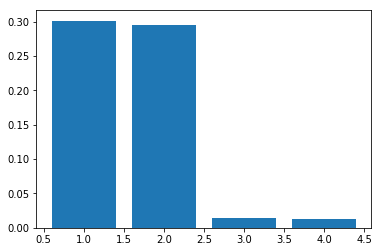

In [32]:
## get mean values and plt
male_pos = df_reviews[df_reviews.gender == 'male'].pos.mean()
male_neg = df_reviews[df_reviews.gender == 'male'].neg.mean()
female_pos = df_reviews[df_reviews.gender == 'female'].pos.mean()
female_neg = df_reviews[df_reviews.gender == 'female'].neg.mean()

X = [male_pos, female_pos, male_neg, female_neg]
plt.bar(range(1, len(X) + 1), X)
plt.show()


### Answer 1:
-   Maybe the house in seattle can made male and female satisfied, and male lived and give feed back more than female.


###   Question 2: sentiment classification of male/female for boston


In [33]:
## drop comments NaN values and add guess gender feature
df_reviews = df_boston_reviews.drop(df_boston_reviews[df_boston_reviews['comments'].isnull()].index)
d = gender.Detector()
df_reviews['gender'] = df_reviews['reviewer_name'].apply(d.get_gender)


In [34]:
## add sentiment score for it
analyzer = SentimentIntensityAnalyzer()
df_reviews['sentiment'] = df_reviews['comments'].apply(analyzer.polarity_scores)
df_reviews = df_reviews.join(df_reviews['sentiment'].apply(pd.Series))
df_reviews.head(3)


,listing_id,id,date,reviewer_id,reviewer_name,comments,gender,sentiment,compound,neg,neu,pos
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,male,"{'neg': 0.0, 'pos': 0.352, 'neu': 0.648, 'comp...",0.9626,0.0,0.648,0.352
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...,female,"{'neg': 0.0, 'pos': 0.361, 'neu': 0.639, 'comp...",0.9061,0.0,0.639,0.361
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...,male,"{'neg': 0.0, 'pos': 0.233, 'neu': 0.767, 'comp...",0.9663,0.0,0.767,0.233


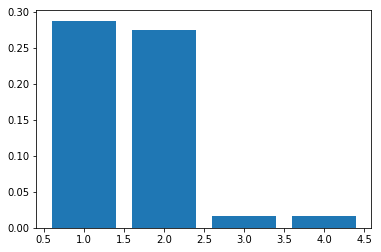

In [35]:
## get mean values and plt
male_pos = df_reviews[df_reviews.gender == 'male'].pos.mean()
male_neg = df_reviews[df_reviews.gender == 'male'].neg.mean()
female_pos = df_reviews[df_reviews.gender == 'female'].pos.mean()
female_neg = df_reviews[df_reviews.gender == 'female'].neg.mean()

X = [male_pos, female_pos, male_neg, female_neg]
plt.bar(range(1, len(X) + 1), X)
plt.show()


###   Answer 2:
-   Maybe the house in boston can made male and female satisfied, and male always give good feedback.


###   Questiong 3: Analyze the Distribute of Pos/Neg


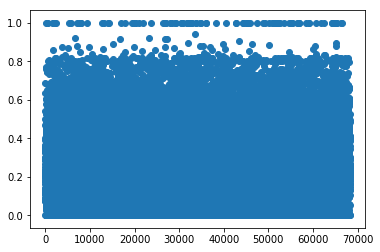

In [53]:
## plot pos score
plt_df = df_reviews.pos
len(plt_df)
X = [ x for x in range(len(plt_df))]
plt.scatter(X, plt_df)


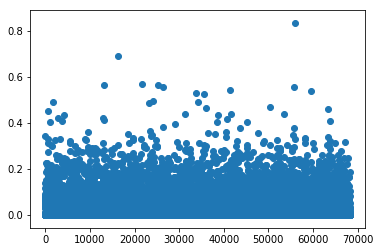

In [54]:
## plot neg score
plt_df = df_reviews.neg
len(plt_df)
X = [ x for x in range(len(plt_df))]
plt.scatter(X, plt_df)


###   Answer 3: 
-   After plot the distribute of pos score, it shows us the score is always in 1.0 or less than 0.8 bigger than 0.
-   After plot the distribute of neg score, it shows us the score is always in range of less than 0.2 and bigger than 0.
